In [59]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [60]:
#Loading the Boston housing dataset from Scikit-learn
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [61]:
#Load the data into Pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MedianValue'] = boston_dataset.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [62]:
#Descriptive statistics for each column
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [63]:
#Checking for missing values in all the columns
boston.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
MedianValue    0
dtype: int64

In [64]:
#Looking for correlation in the attributes
corr_value = boston.corr()
corr_value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianValue
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [65]:
corr_value["MedianValue"].sort_values(ascending=False)

MedianValue    1.000000
RM             0.695360
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
AGE           -0.376955
RAD           -0.381626
CRIM          -0.385832
NOX           -0.427321
TAX           -0.468536
INDUS         -0.483725
PTRATIO       -0.507787
LSTAT         -0.737663
Name: MedianValue, dtype: float64

In [66]:
#Using train_test_split function to split the data into training dataset and testing dataset
from sklearn.model_selection import train_test_split
#Considering two highly correlated attributes for predictions
X= boston[['RM','LSTAT']]
Y= boston[['MedianValue']]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [67]:
#To set up with Linear Regression model
from sklearn.linear_model import LinearRegression
#To Instantiate the model 
lin_reg = LinearRegression()
#To train the model on training dataset
lin_reg.fit(X_train,Y_train)
#To making predictions on testing dataset
Y_predictions_lr =lin_reg.predict(X_test)
#Measuring Root mean square error(RMSE) for the Linear Regression model
lin_mse = mean_squared_error(Y_test, Y_predictions_lr)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.589569804715174

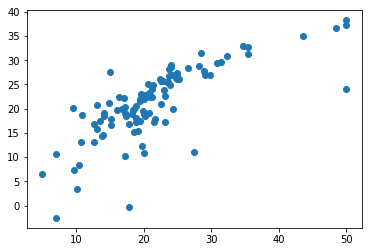

In [73]:
# Plotting the Y_test vs Y_predictions_lr
# ideally should have been a straight line
plot.scatter(Y_test, Y_predictions_lr)
plot.show()

In [76]:
#Let us check the outcome with DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
#To fit the decision tree regressor with X_train and Y_train data 
tree_reg.fit(X_train, Y_train)
Y_predictions_dt=tree_reg.predict(X_test)
#To measure Root mean square error(RMSE) for the DecisionTreeRegressor
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predictions_dt)))
rmse

6.880207475211833

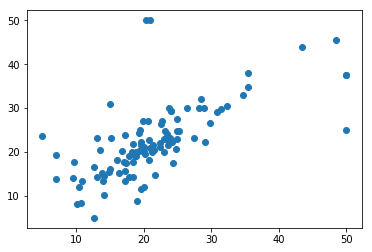

In [79]:
# Plotting the Y_test vs Y_predictions_dt
plot.scatter(Y_test, Y_predictions_dt)
plot.show()

In [84]:
#Calcuting the Root mean square error for RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,Y_train)
Y_predictions_rf= forest_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predictions_rf)))
rmse

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


4.879308151696887

In [85]:
#Modified to fix the Warning message
model = forest_reg.fit(X_train, Y_train.values.ravel())
Y_predictions_rf= forest_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predictions_rf)))
rmse

5.052109635063939

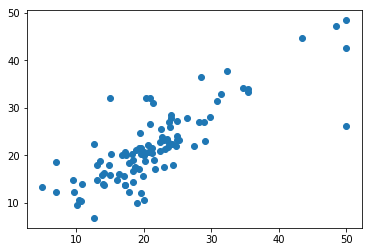

In [87]:
# plotting the Y_test vs Y_predictions_rf
plot.scatter(Y_test, Y_predictions_rf)
plot.show()